In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from olist.order import Order
order = Order().get_training_data(with_distance_seller_customer=True)
from olist.seller import Seller
sellers = Seller().get_training_data()
reviews=Seller().get_review_score()
from olist.data import Olist
data = Olist().get_data()

In [2]:
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,0.333333,0.333333,3.00,140
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,0.050000,0.725000,4.55,240
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,0.000000,1.000000,5.00,0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,0.000000,1.000000,5.00,0
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0.000000,1.00,100


In [11]:
sellstate=sellers.groupby(['seller_state']).mean()
sellstate.head()

/var/folders/wf/wz1_qkfj6p9g2bq93bwdtvlw0000gn/T/ipykernel_55799/3683946392.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sellstate=sellers.groupby(['seller_state']).mean()


,delay_to_carrier,wait_time,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews
seller_state,,,,,,,,,,,
AM,0.000000,47.840802,1.000000,3.000000,3.000000,1.000000,1177.000000,0.666667,0.333333,2.333333,200.000000
BA,0.000000,15.945623,5.833333,31.555556,35.666667,1.054872,15860.781111,0.122232,0.588139,4.095019,465.555556
CE,1.553288,19.593723,5.166667,7.500000,7.750000,1.021605,1681.311667,0.202817,0.523960,3.679398,117.500000
DF,0.470637,13.150120,8.000000,27.466667,29.966667,1.158871,3258.316000,0.159225,0.617219,4.032114,476.000000
ES,0.085535,12.441348,3.409091,14.318182,16.772727,1.122045,2160.665455,0.047471,0.654419,4.410881,217.272727


<AxesSubplot: xlabel='seller_state', ylabel='sales'>

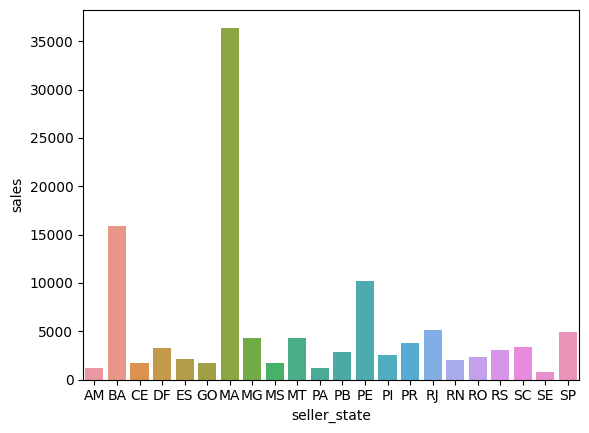

In [24]:
sns.barplot(data=sellstate, x=sellstate.index, y="sales")

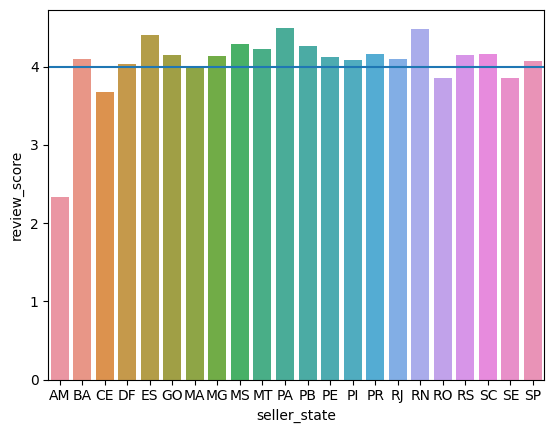

In [28]:
sns.barplot(data=sellstate,x=sellstate.index,y='review_score').axhline(4)

In [67]:
sellstate['review_score']>4

seller_state
AM    False
BA     True
CE    False
DF     True
ES     True
GO     True
MA    False
MG     True
MS     True
MT     True
PA     True
PB     True
PE     True
PI     True
PR     True
RJ     True
RN     True
RO    False
RS     True
SC     True
SE    False
SP     True
Name: review_score, dtype: bool

In [76]:
list=[]
for x in sellstate['review_score']>4:
    if x:
        list.append(x)
list

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [3]:
order.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,5,1,1,19.90,8.72,30.174037


In [4]:
data.head()

AttributeError: 'dict' object has no attribute 'head'